# Modules

In [1]:
import os
import pandas as pd
import yfinance as yf
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Reading data
Download Gold data [here](https://www.kaggle.com/datasets/alireza151/gold-xauusd-prediction-and-forcast-using-arima)

In [2]:
read_dir = r'C:\Users\ed_22\Documents\Selected-Statistics-Topics\Partial-II\Practice'
file_name = 'Gold.xlsx'
read_path = os.path.join(read_dir, file_name)

data = pd.read_excel(read_path,
                   usecols=['Date', 'Close'],
                  date_parser='Date').set_index('Date')

In [3]:
data.head()

,Close
Date,
2021-07-04,1786.39
2021-07-05,1791.15
2021-07-06,1795.68
2021-07-07,1803.22
2021-07-08,1803.75


In [4]:
data.shape

(622, 1)

## Plotting

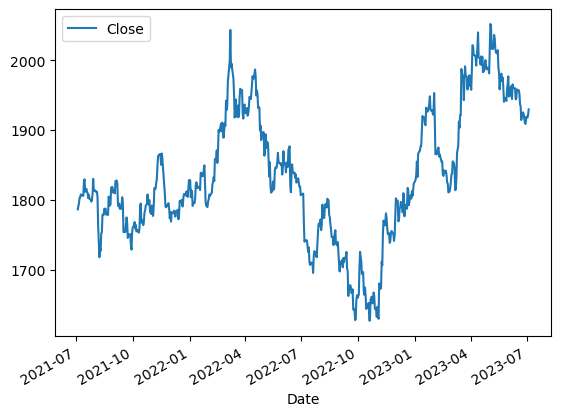

In [5]:
data.plot()
plt.show()

## `q`: Stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
p_value = adfuller(data)[1]
p_value <= 0.05

False

### First difference

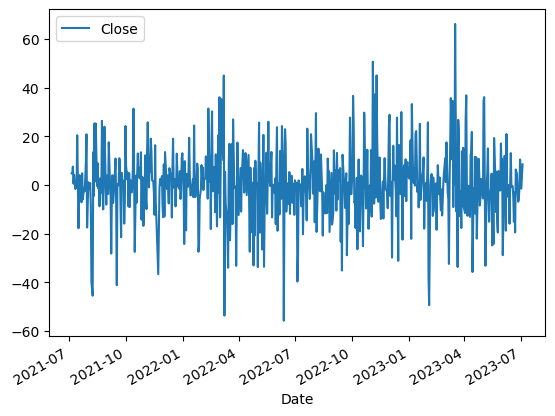

In [8]:
diff_data = data.diff().dropna()
diff_data.plot()
plt.show()

In [9]:
p_value = adfuller(diff_data)[1]
p_value <= 0.05

True

`d = 1`

## Easier way...

In [10]:
from pmdarima.arima.utils import ndiffs
d = ndiffs(data)
d

1

## `p`: AR

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\ed_22\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


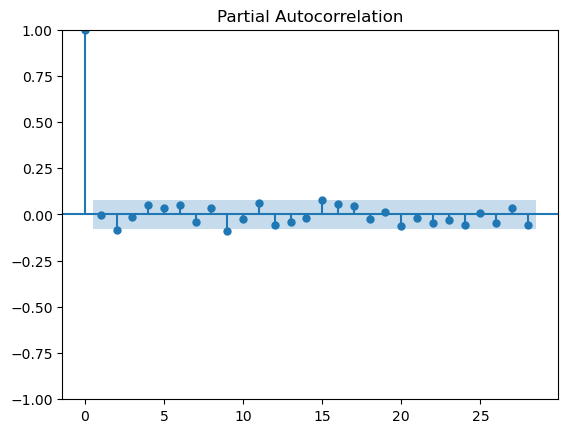

In [12]:
plot_pacf(diff_data)
plt.show()

`p = 2`

## `q`: MA

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

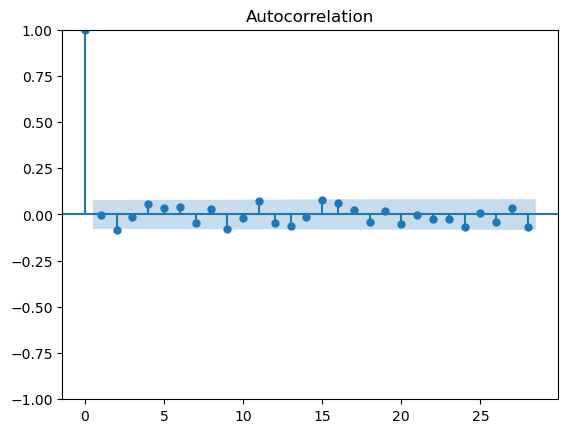

In [14]:
plot_acf(diff_data)
plt.show()

`q = 2`

# Get the orders

In [15]:
order = auto_arima(data, start_p=0, star_q=0, start_order=0, max_p=5, max_q=5, max_order=5, trace=True, seasonal=False, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5109.248, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5111.243, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5109.311, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5111.286, Time=0.24 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5110.762, Time=0.29 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=5111.885, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5111.243, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5112.555, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5111.302, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5112.428, Time=0.51 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5111.758, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5108.863, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5110.823, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5108.372, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5110.093, Time=0.72 sec
 ARIMA(3,1

And for the seasonal time series?

Search [here](https://www.kaggle.com/code/muhammadelhafedi/air-passenger-time-series-forecasting-sarimax)